<h1>Experimental Data Analysis</h1>

In [41]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

orders = pd.read_csv("olist_orders_dataset.csv")
products = pd.read_csv("olist_products_dataset.csv")
reviews = pd.read_csv("olist_order_reviews_dataset.csv")
products_names = pd.read_csv("olist_order_items_dataset.csv")
payments = pd.read_csv("olist_order_payments_dataset.csv")

In [42]:
# convert orders timestamp to datatime
orders['order_purchase_timestamp'] = pd.to_datetime(orders["order_purchase_timestamp"])
orders['order_delivered_customer_date'] = pd.to_datetime(orders["order_delivered_customer_date"])
orders.head()

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13 00:00:00
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04 00:00:00
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:06,2017-11-18 19:45:59,2017-11-22 13:39:59,2017-12-02 00:28:42,2017-12-15 00:00:00
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13 21:18:39,2018-02-13 22:20:29,2018-02-14 19:46:34,2018-02-16 18:17:02,2018-02-26 00:00:00


<h3>Analysis of orders by day of the week</h3>

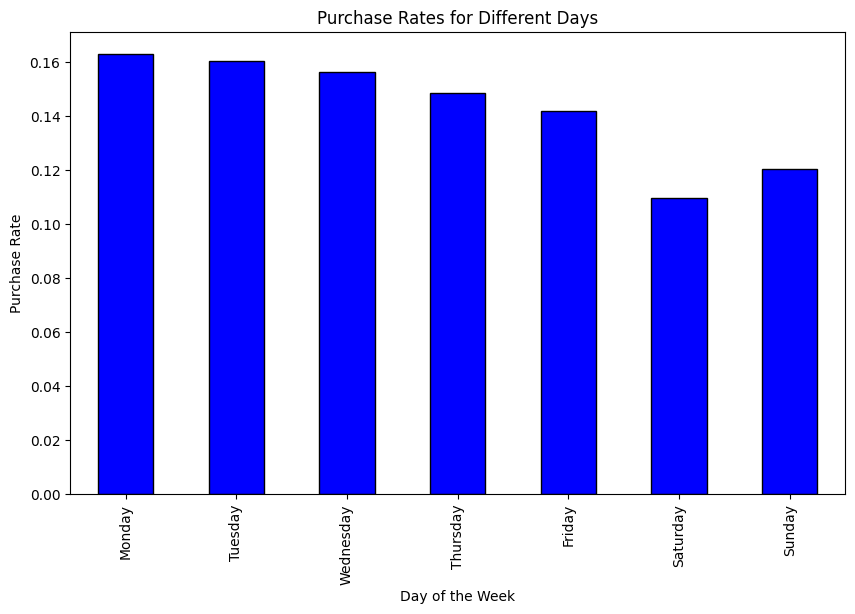

In [43]:
orders['purchase_day'] = orders['order_purchase_timestamp'].dt.day_name()

day_order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']

orders['purchase_day'] = pd.Categorical(orders['purchase_day'], categories=day_order, ordered=True)

# Calculate purchase rates for each day
purchase_rates = orders['purchase_day'].value_counts(normalize=True).sort_index()

# Visualize the purchase rates
plt.figure(figsize=(10, 6))
purchase_rates.plot(kind='bar', color='blue', edgecolor='black')
plt.title('Purchase Rates for Different Days')
plt.xlabel('Day of the Week')
plt.ylabel('Purchase Rate')
plt.show()

<h3>Analysis of orders by day of the year</h3>

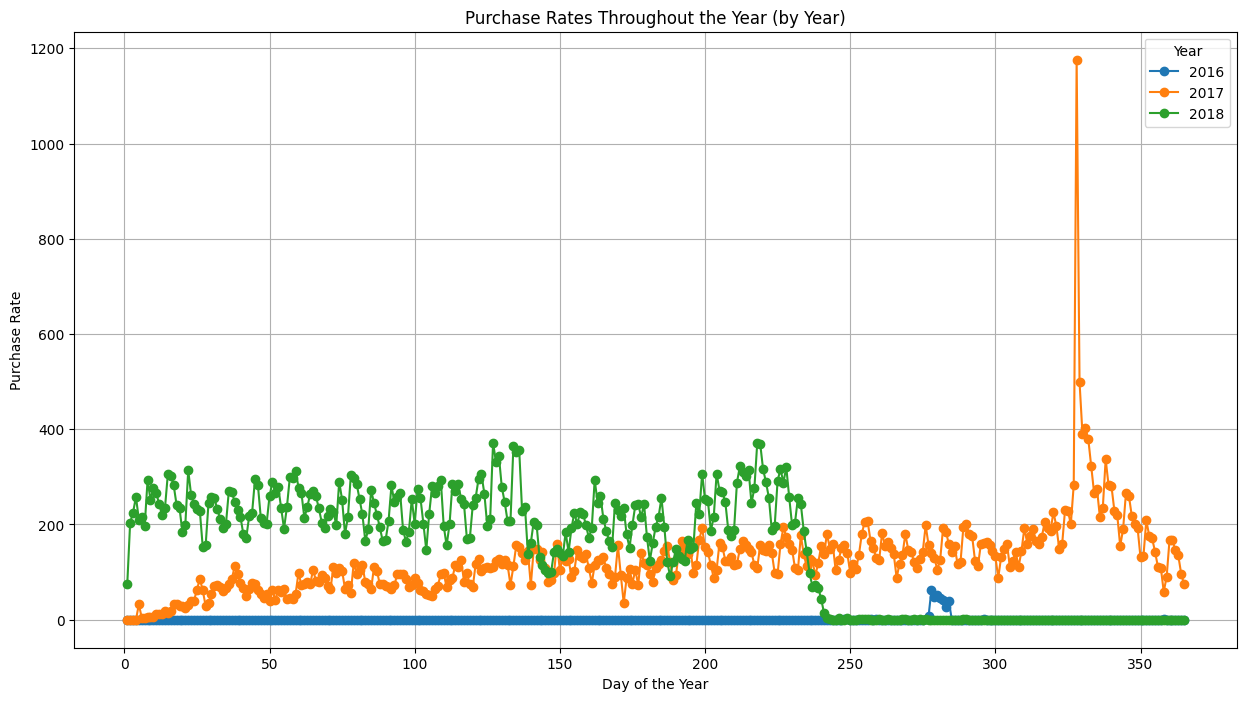

In [44]:
orders['purchase_day'] = orders['order_purchase_timestamp'].dt.dayofyear
orders['purchase_year'] = orders['order_purchase_timestamp'].dt.year

purchase_rates_by_year = orders.groupby(['purchase_year', 'purchase_day']).size().unstack(fill_value=0)

# Visualize the purchase rates for each year
plt.figure(figsize=(15, 8))
for year in purchase_rates_by_year.index:
    plt.plot(purchase_rates_by_year.columns, purchase_rates_by_year.loc[year], label=year, marker='o')

plt.title('Purchase Rates Throughout the Year (by Year)')
plt.xlabel('Day of the Year')
plt.ylabel('Purchase Rate')
plt.legend(title='Year', loc='upper right')
plt.grid(True)
plt.show()

<h3> How significant is delivery time in user satisfaction </h3<

In [45]:
# calculate duration of delivery in hours
orders["duration"] = orders["order_delivered_customer_date"] - orders["order_purchase_timestamp"]
orders["duration"] = orders["duration"].dt.total_seconds() / 3600
orders.head()

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,purchase_day,purchase_year,duration
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00,275,2017,202.477778
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13 00:00:00,205,2018,330.768889
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04 00:00:00,220,2018,225.461111
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:06,2017-11-18 19:45:59,2017-11-22 13:39:59,2017-12-02 00:28:42,2017-12-15 00:00:00,322,2017,317.010000
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13 21:18:39,2018-02-13 22:20:29,2018-02-14 19:46:34,2018-02-16 18:17:02,2018-02-26 00:00:00,44,2018,68.973056


In [46]:
# merge orders data with reviews data 
merged_df = pd.merge(orders, reviews, on='order_id', how='inner')
merged_df.head()

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,purchase_day,purchase_year,duration,review_id,review_score,review_comment_title,review_comment_message,review_creation_date,review_answer_timestamp
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00,275,2017,202.477778,a54f0611adc9ed256b57ede6b6eb5114,4,NaN,"Não testei o produto ainda, mas ele veio corre...",2017-10-11 00:00:00,2017-10-12 03:43:48
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13 00:00:00,205,2018,330.768889,8d5266042046a06655c8db133d120ba5,4,Muito boa a loja,Muito bom o produto.,2018-08-08 00:00:00,2018-08-08 18:37:50
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04 00:00:00,220,2018,225.461111,e73b67b67587f7644d5bd1a52deb1b01,5,NaN,NaN,2018-08-18 00:00:00,2018-08-22 19:07:58
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:06,2017-11-18 19:45:59,2017-11-22 13:39:59,2017-12-02 00:28:42,2017-12-15 00:00:00,322,2017,317.010000,359d03e676b3c069f62cadba8dd3f6e8,5,NaN,O produto foi exatamente o que eu esperava e e...,2017-12-03 00:00:00,2017-12-05 19:21:58
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13 21:18:39,2018-02-13 22:20:29,2018-02-14 19:46:34,2018-02-16 18:17:02,2018-02-26 00:00:00,44,2018,68.973056,e50934924e227544ba8246aeb3770dd4,5,NaN,NaN,2018-02-17 00:00:00,2018-02-18 13:02:51


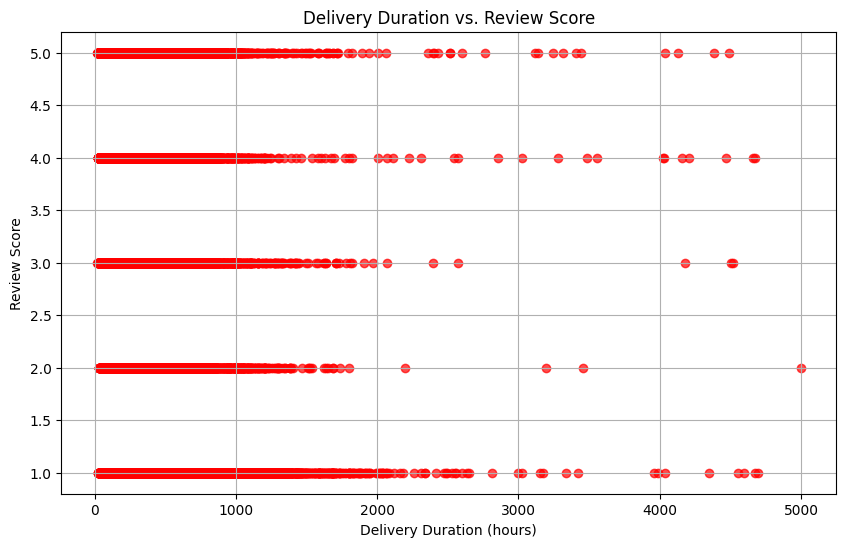

In [47]:
# Scatter plot
plt.figure(figsize=(10, 6))
plt.scatter(merged_df['duration'], merged_df['review_score'], color='red', alpha=0.7)
plt.title('Delivery Duration vs. Review Score')
plt.xlabel('Delivery Duration (hours)')
plt.ylabel('Review Score')
plt.grid(True)
plt.show()

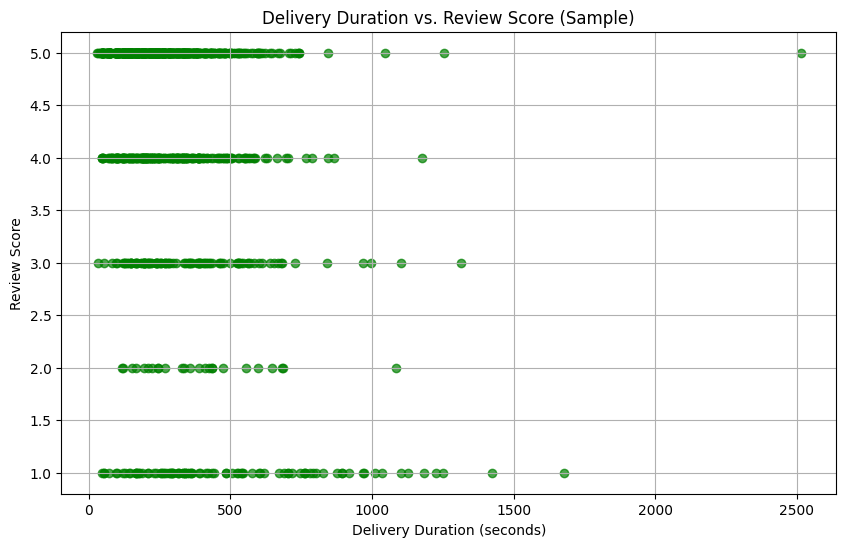

In [48]:
sample_size = 0.01  # 1% of the data to see more clearly
df_sample = merged_df.sample(frac=sample_size, random_state=42)

# Scatter plot
plt.figure(figsize=(10, 6))
plt.scatter(df_sample['duration'], df_sample['review_score'], color='green', alpha=0.7)
plt.title('Delivery Duration vs. Review Score (Sample)')
plt.xlabel('Delivery Duration (seconds)')
plt.ylabel('Review Score')
plt.grid(True)
plt.show()

<h3>Are products with more pictures more popular</h3>

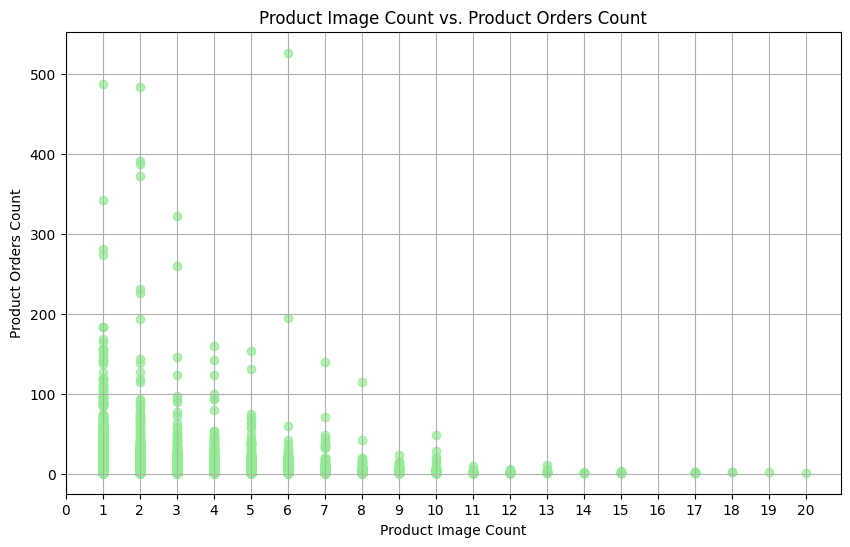

In [49]:
images_to_product  = products[["product_id","product_photos_qty"]] # get the number of pictures of each product
orders_count = products_names['product_id'].value_counts() # count the orders of the product
results = pd.merge(images_to_product, orders_count, on='product_id', how='inner') # merge data

# scatter plot the relation between number of images and number of orders
plt.figure(figsize=(10, 6))
plt.scatter(results['product_photos_qty'], results['count'], color='lightgreen', alpha=0.7)
plt.title('Product Image Count vs. Product Orders Count')
plt.xlabel('Product Image Count')
plt.ylabel('Product Orders Count')
plt.xticks(np.arange(0, 21, 1))
plt.grid(True)
plt.show()



<h3>products with longer (supposedly more engaging) description are more popular (maybe consider the aggregation of product categories) </h3> 

In [50]:
#TODO

<h3>weight might be somehow related to shipping: heavier weights take longer to ship (grouped together maybe) </h3>

In [51]:
#TODO

<h3>What about the mean and variance of spending / number of products purchased by customers in the 2 major cities (Sao Paulo and Rio De janeiro) ? can any meaningful insights be derived from that ?</h3>

In [52]:
#TODO

<h3>can we find different means for different regions in general: states / or simply groups created from the geo coordinates? (might require some geospatial processing) </h3>

In [53]:
#TODO

<h3>Are customers inclined to spend more with a higher number of payments ? </h3>

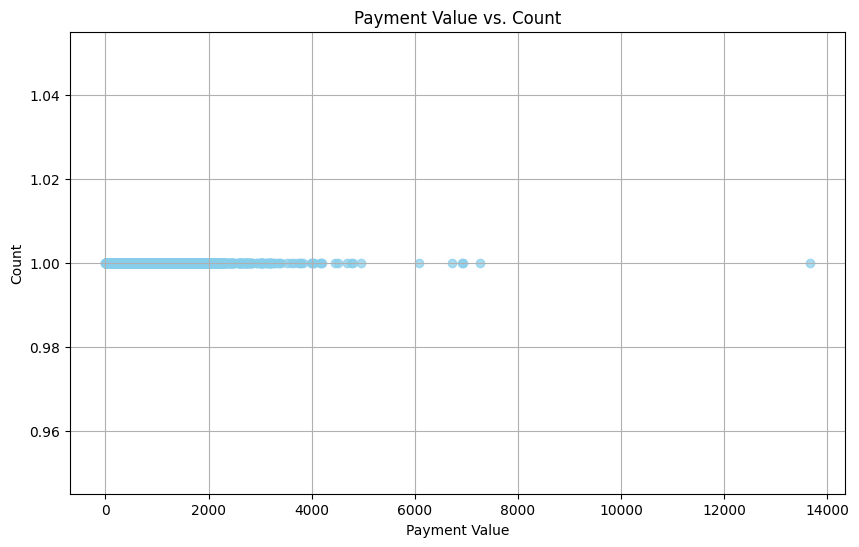

In [80]:
ord = orders[["customer_id", "order_id"]] # get orders of each customer
prices = payments[["order_id","payment_value"]] # get the payments of each customer
res = pd.merge(ord, prices, on='order_id', how='inner')  # merge the orders with the payments

# calculate the total spendings of each customer
sum_payment_by_customer = res.groupby('customer_id')['payment_value'].sum().reset_index() 
sum_payment_by_customer.columns = ['customer_id', 'sum']

# calculate the number of orders of each customer
number_payments_by_customer = ord["customer_id"].value_counts().reset_index()
number_payments_by_customer.columns = ['customer_id', 'count']

# result show that every customer only ordered one time
# double check data  
number_payments_by_customer['count'].value_counts()

dt = pd.merge(sum_payment_by_customer, number_payments_by_customer, on='customer_id', how='inner')
plt.figure(figsize=(10, 6))
plt.scatter(dt['sum'], dt['count'], color='skyblue', alpha=0.7)
plt.title('Payment Value vs. Count')
plt.xlabel('Payment Value')
plt.ylabel('Count')
plt.grid(True)
plt.show()
